In [2]:
import matplotlib.pyplot as plt
import matplotlib
import aplpy
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import math as m
import scipy.optimize as opt

matplotlib.rcParams['figure.figsize'] = (15, 7)


In [3]:
##plotting using aplpy
#var_Q = aplpy.FITSfigure('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_Q.fits')
#var_Q.show_grayscale()

#var_U = aplpy.FITSfigure('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_U.fits')
#var_U.show_grayscale()

#ang = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_ang.fits')
#ang.show_grayscale()

#I = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits')
#I.show_grayscale()

#p = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits')
#p.show_grayscale()

#polint = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits')
#polint.show_grayscale()

#Q = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits')
#Q.show_grayscale()

#S = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits')
#S.show_grayscale()

#s2n = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_s2n_polint.fits')
#s2n.show_grayscale()

#U = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits')
#U.show_grayscale()

#var_polint = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits')
#var_polint.show_grayscale()

hill_data = fits.getdata('fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits', ext = 0)
var_Q_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_Q.fits', ext = 0)
var_U_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_U.fits', ext = 0)
ang_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_ang.fits', ext=0)
I_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits', ext=0)
p_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits', ext=0)
polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits', ext = 0)
Q_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits', ext=0)
S_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits', ext = 0)
s2n_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_s2n_polint.fits', ext = 0)
U_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits', ext = 0)
var_polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits', ext=0)

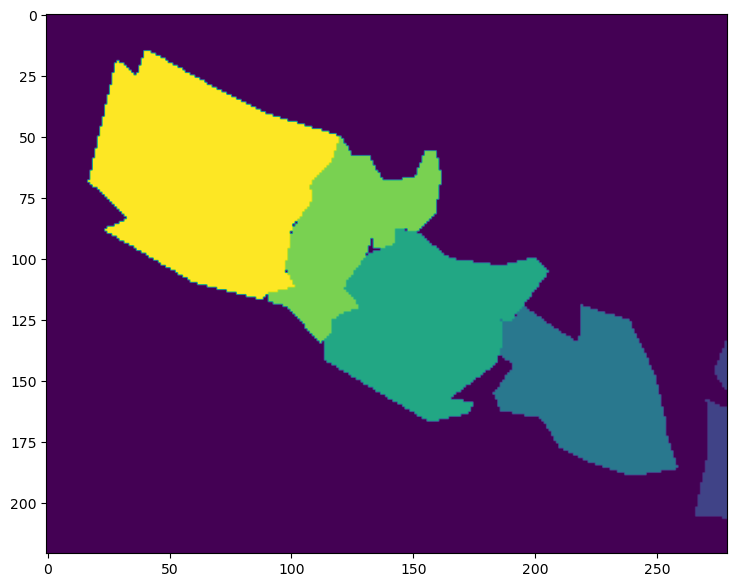

In [4]:
plt.imshow(hill_data)

In [5]:
mask = np.logical_and(hill_data>0, polint_data>3*np.sqrt(var_polint_data))
i_good = mask.nonzero()
#i_good_coord = np.transpose(np.nonzero(i_good))
p_good = p_data[i_good]
p_good

array([0.05166297, 0.05306193, 0.05457129, ..., 0.08374195, 0.08176174,
       0.07991301])

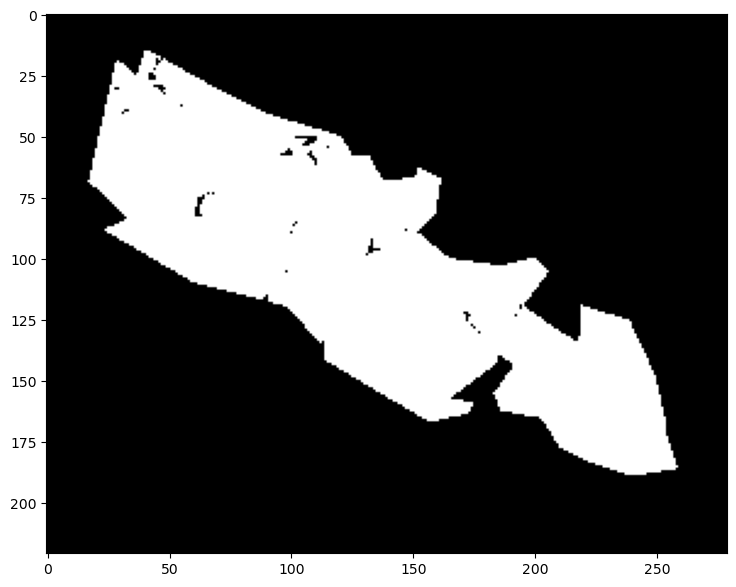

In [6]:
plt.imshow(mask, cmap='gray')
plt.show()

Gamma $\gamma$:
\begin{align}
    \text{cos}^2\gamma & = \frac{1+\text{cos}(2\gamma)}{2}\\
    \frac{1+\text{cos}(2\gamma)}{2} & = \frac{p_{obs}(1+\frac{2}{3}p_0)}{p_0(1+p_{obs})}\\
    \gamma &= \frac{1}{2}\text{cos}^{-1}\left(\frac{2p_{obs}(1+\frac{2}{3}p_0)}{p_0(1+p_{obs})}-1\right)
\end{align}

Text(0.5, 1.0, 'PDF of (pol_frac?) Vela C')

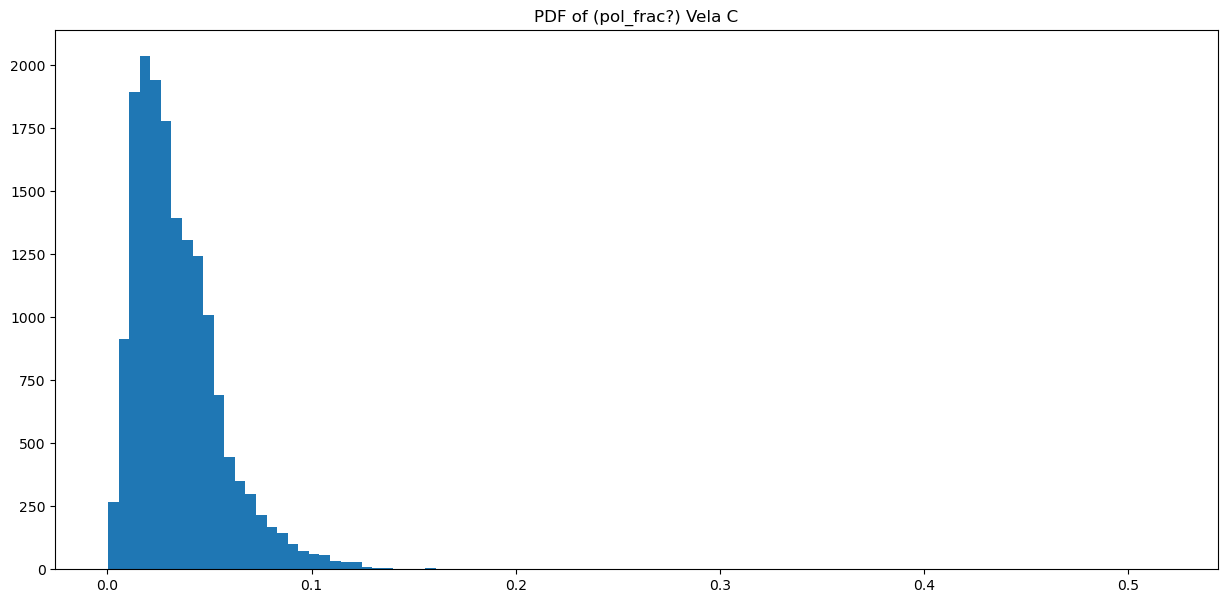

In [7]:
hist, bins, patches = plt.hist(p_good, 100)
plt.title('PDF of (pol_frac?) Vela C')

array([ 1.86691607e+03,  2.68854771e-02, -1.86391782e-02])

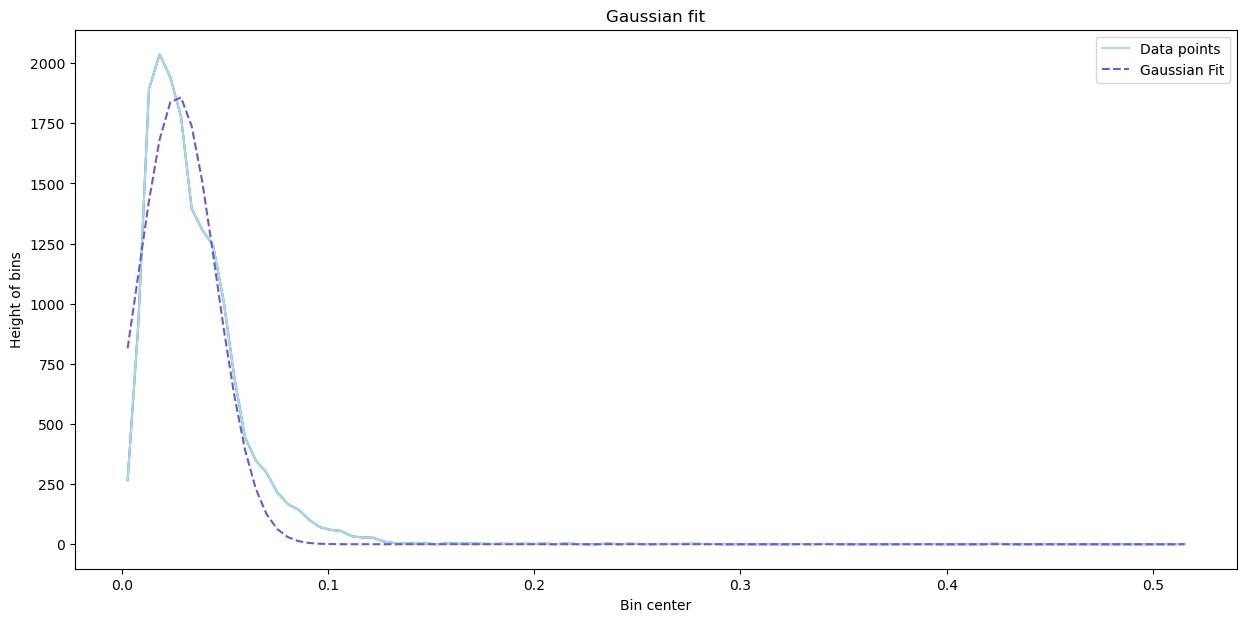

In [30]:
bincenter = np.zeros(len(bins)-1)             #array of zeroes for bincenter

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    bincenter[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(bincenter, hist)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPar,gCov = opt.curve_fit(gaussian,bincenter, hist,p0=(2000,0.15,0.05))#fitting the data points

gaussfit1 = gaussian(bincenter, gPar[0], gPar[1], gPar[2])


#plotting the Gaussian fit
plt.plot(bincenter, hist, '-', color = 'lightblue', label = 'Data points')
plt.plot(bincenter, gaussfit1, '--',color = 'slateblue', label = 'Gaussian Fit')
plt.legend()
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

plt.grid()
gPar

(0.0, 65.0)

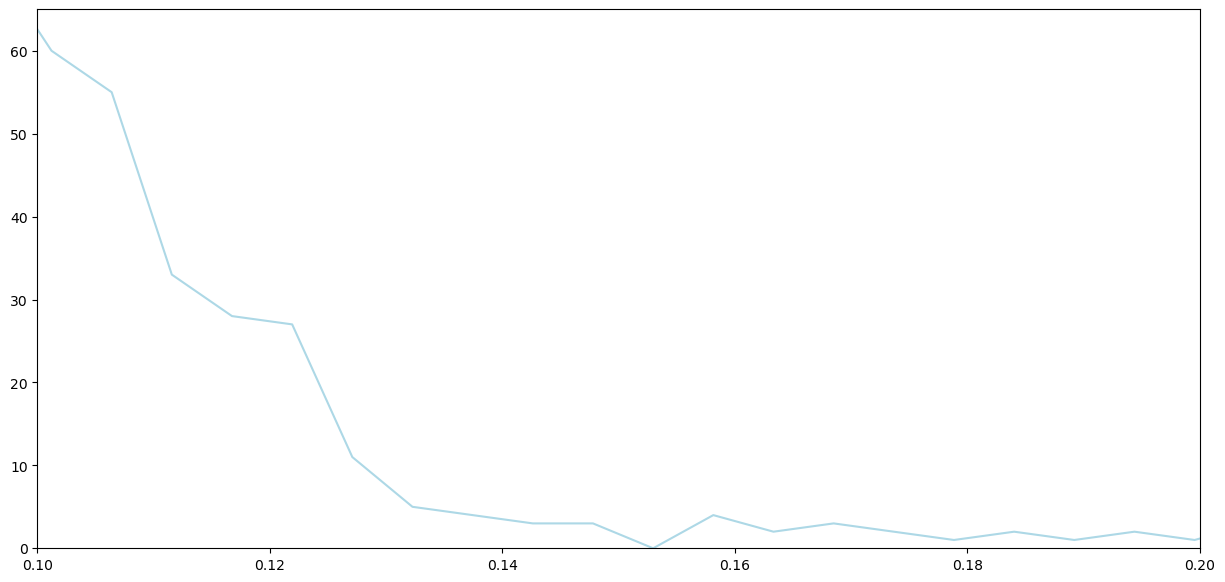

In [40]:
plt.plot(bincenter, hist, '-', color = 'lightblue', label = 'Data points')
plt.xlim(0.1, 0.2)
plt.ylim(0, 65)

/var/folders/lp/bh247h21459_r2sf0dzyrx_w0000gn/T/ipykernel_13784/1363221179.py:3: RuntimeWarning: invalid value encountered in arccos
  gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]


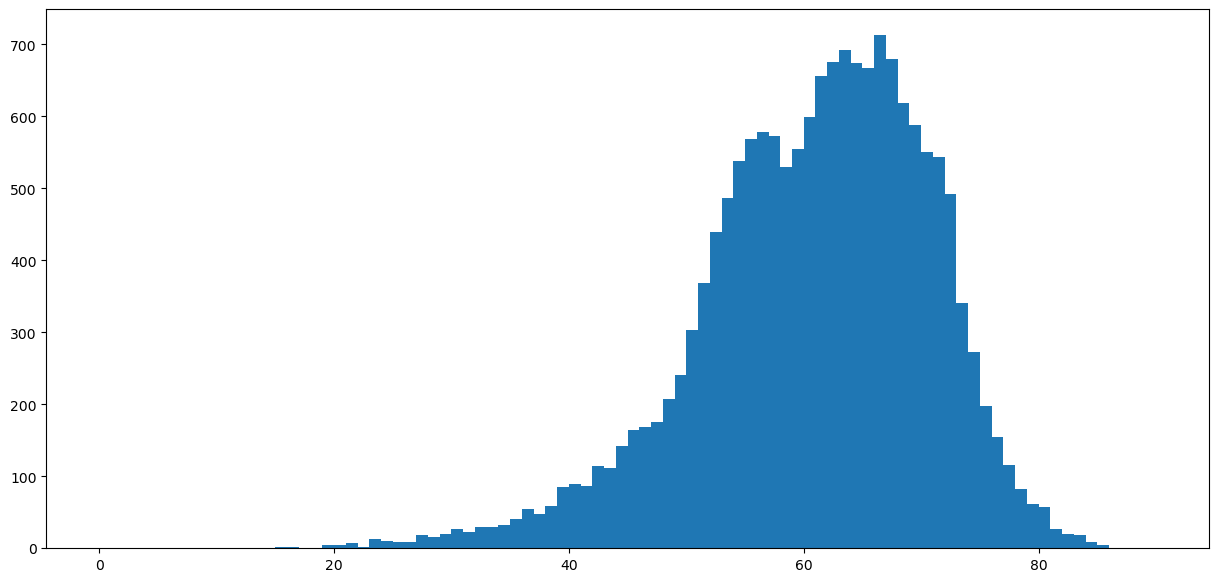

In [21]:
p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]
hist1, bins, patches = plt.hist(gamma, 90, range= (0,90))

fractional polarization, $p$:
\begin{align}
    p&=\frac{p_0\text{cos}^2\gamma}{1-p_0(\text{cos}^2\gamma-\frac{2}{3})}
\end{align}

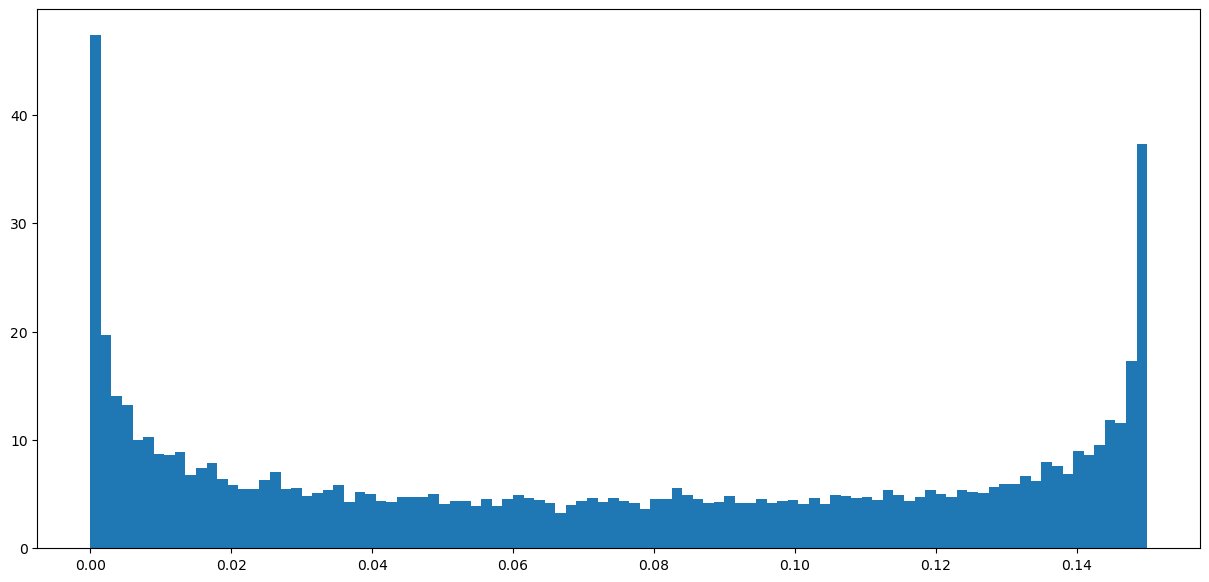

In [22]:
p_frac = [(p_0*(np.cos(g))**2)/(1-p_0*((np.cos(g))**2-(2/3))) for g in gamma]
histogram = plt.hist(p_frac, density=True, bins = 100)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


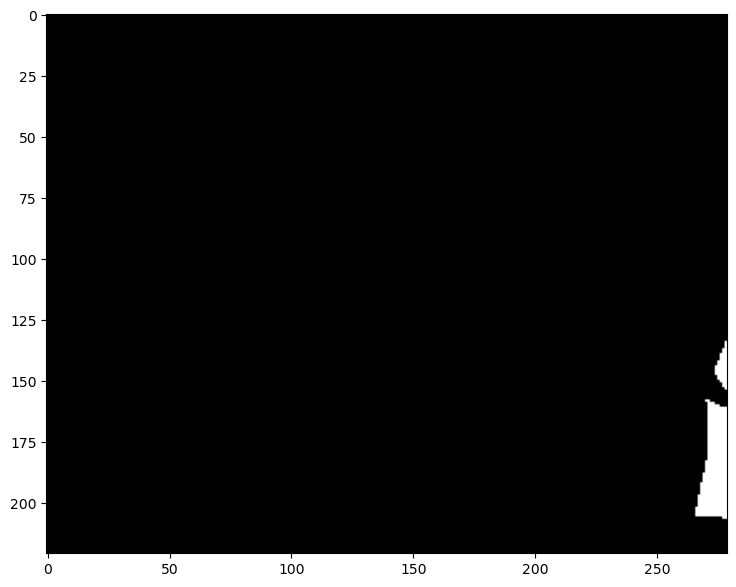

In [23]:
mask1 = hill_data==1
plt.imshow(mask1, cmap = 'gray')

mask = np.logical_and(hill_data==1, polint_data>3*np.sqrt(var_polint_data))
i_good = mask.nonzero()
#i_good_coord = np.transpose(np.nonzero(i_good))
p_good = p_data[i_good]

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1) for p_obs in p_good]
hist1, bins, patches = plt.hist(gamma, 100)

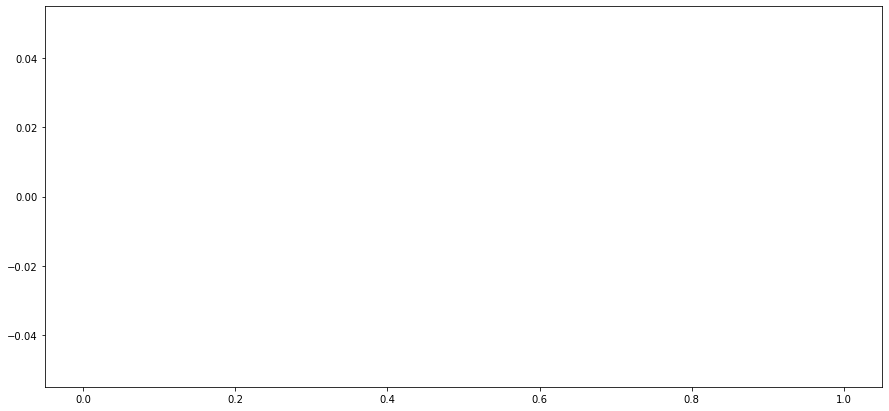

In [11]:
hist1, bins, patches = plt.hist(gamma, 100)

array([4.49456383e-14, 1.09999999e+00, 1.99999998e-01])

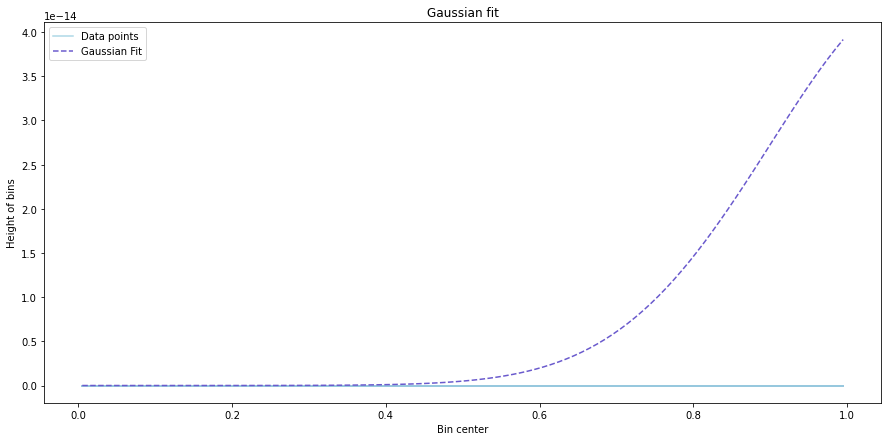

In [12]:
gauss1 = np.zeros(len(bins)-1)             #array of zeroes for bincenter

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gauss1[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gauss1, hist1)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPar,gCov = opt.curve_fit(gaussian,gauss1, hist1,p0=(600,1.1,0.2))#fitting the data points

gaussfit1 = gaussian(gauss1, gPar[0], gPar[1], gPar[2])

#plotting the Gaussian fit
plt.plot(gauss1, hist1, '-', color = 'lightblue', label = 'Data points')
plt.plot(gauss1, gaussfit1, '--',color = 'slateblue', label = 'Gaussian Fit')
plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

plt.grid()
gPar

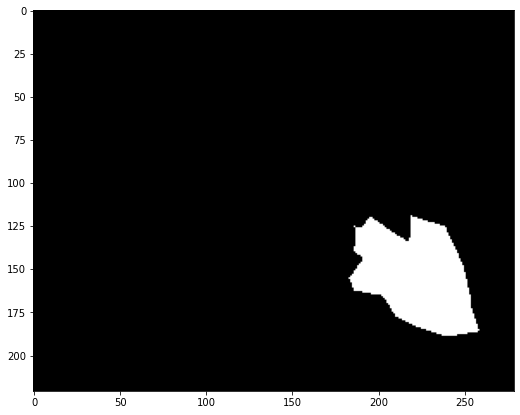

In [13]:
mask2 = hill_data==2
plt.imshow(mask2, cmap = 'gray')

mask = np.logical_and(hill_data==2, polint_data>3*np.sqrt(var_polint_data))
i_good = mask.nonzero()
#i_good_coord = np.transpose(np.nonzero(i_good))
p_good = p_data[i_good]

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]

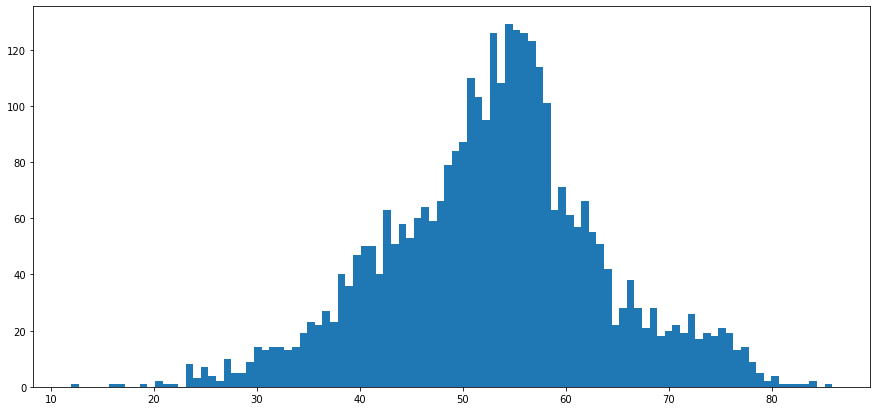

In [14]:
hist2, bins, patches = plt.hist(gamma, 100)

array([104.59604717,  53.31587451,   9.05346275])

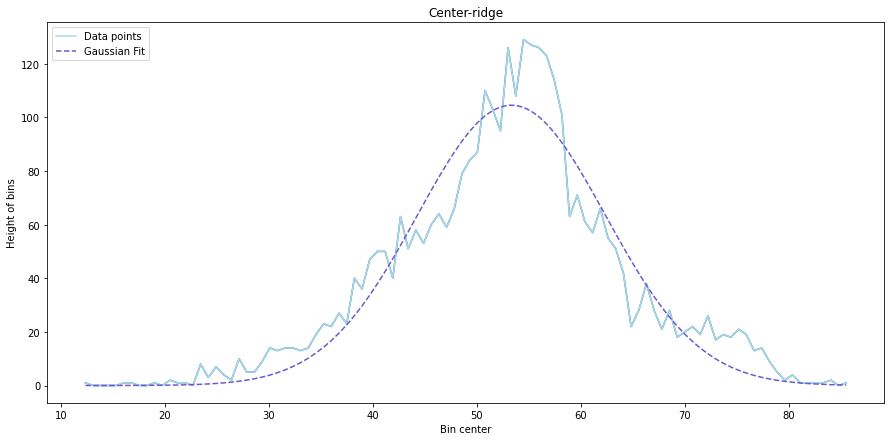

In [15]:
gauss2 = np.zeros(len(bins)-1)             #array of zeroes for bincenter

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gauss2[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gauss2, hist2)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPar,gCov = opt.curve_fit(gaussian,gauss2, hist2,p0=(600,60,0.2))#fitting the data points

gaussfit2 = gaussian(gauss2, gPar[0], gPar[1], gPar[2])


#plotting the Gaussian fit
plt.plot(gauss2, hist2, '-', color = 'lightblue', label = 'Data points')
plt.plot(gauss2, gaussfit2, '--',color = 'slateblue', label = 'Gaussian Fit')
plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.title('Center-ridge')

plt.grid()
gPar

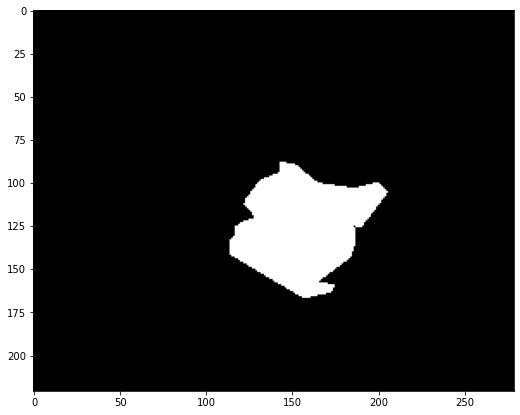

In [16]:
mask3 = hill_data==3
plt.imshow(mask3, cmap = 'gray')

mask = np.logical_and(hill_data==3, polint_data>3*np.sqrt(var_polint_data))
i_good = mask.nonzero()
#i_good_coord = np.transpose(np.nonzero(i_good))
p_good = p_data[i_good]

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]

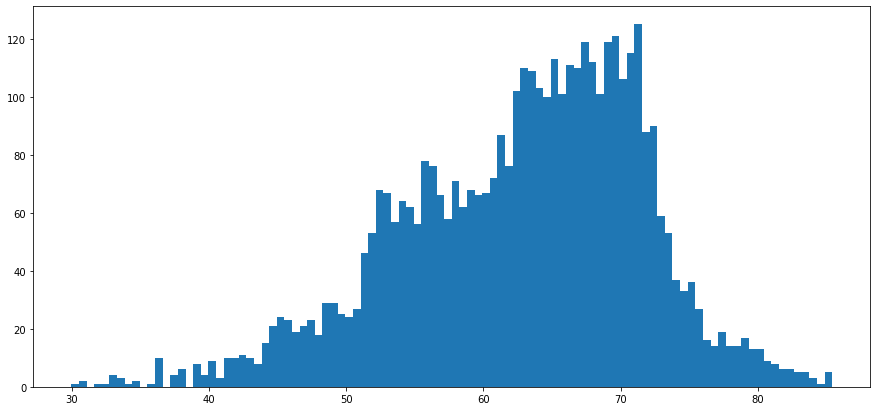

In [17]:
hist3, bins, patches = plt.hist(gamma, 100)

array([107.25944832,  64.46078736,   8.56808016])

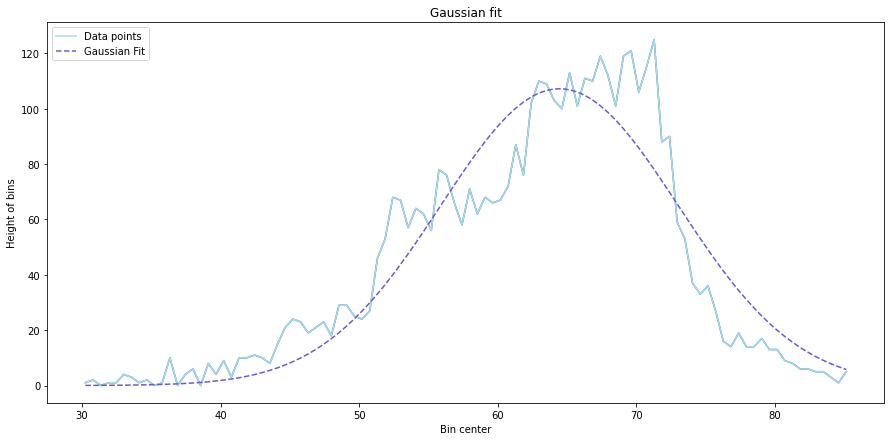

In [18]:
gauss3 = np.zeros(len(bins)-1)             #array of zeroes for bincenter

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gauss3[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gauss3, hist3)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPar,gCov = opt.curve_fit(gaussian,gauss3, hist3,p0=(120,60,0.2))#fitting the data points

gaussfit3 = gaussian(gauss3, gPar[0], gPar[1], gPar[2])


#plotting the Gaussian fit
plt.plot(gauss3, hist3, '-', color = 'lightblue', label = 'Data points')
plt.plot(gauss3, gaussfit3, '--',color = 'slateblue', label = 'Gaussian Fit')
plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

plt.grid()
gPar

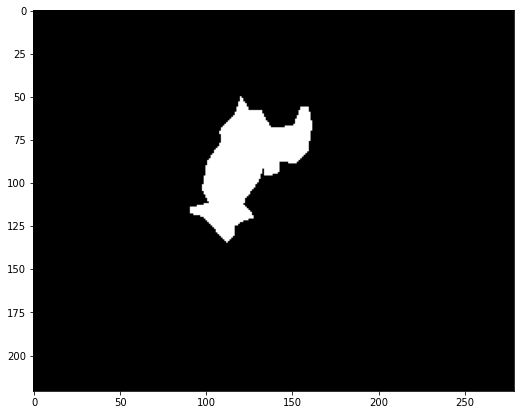

In [19]:
mask4 = hill_data==4
plt.imshow(mask4, cmap = 'gray')

mask = np.logical_and(hill_data==4, polint_data>3*np.sqrt(var_polint_data))
i_good = mask.nonzero()
#i_good_coord = np.transpose(np.nonzero(i_good))
p_good = p_data[i_good]

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]

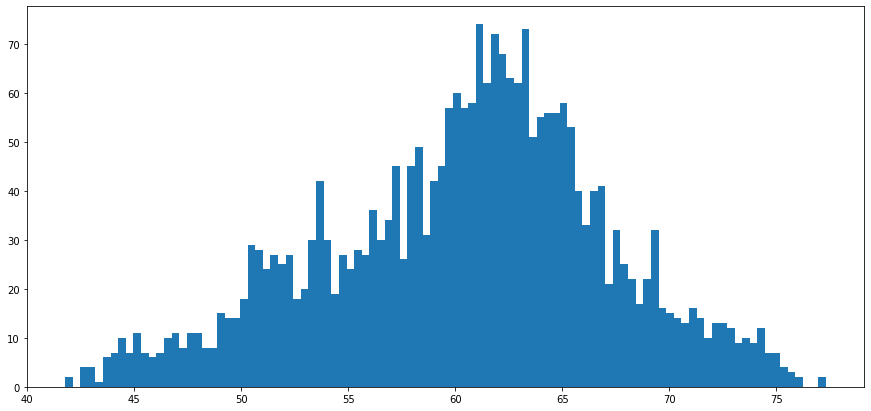

In [20]:
hist4, bins, patches = plt.hist(gamma, 100)

array([56.46668109, 61.30567884,  6.27727551])

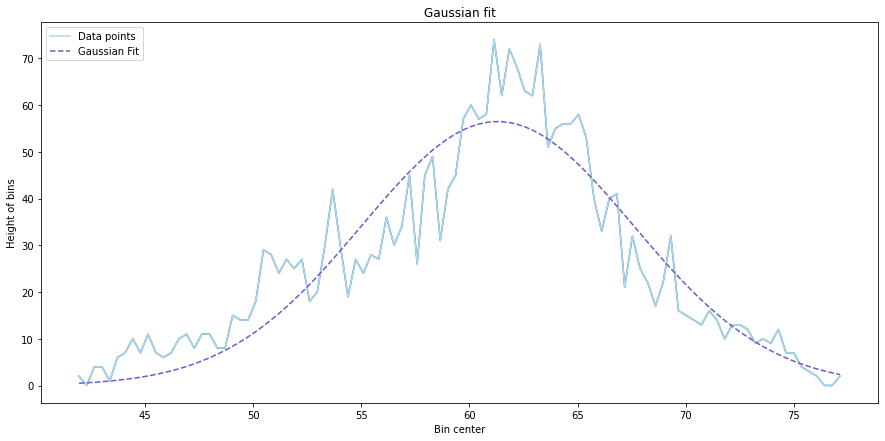

In [21]:


gauss4 = np.zeros(len(bins)-1)             #array of zeroes for bincenter

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gauss4[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gauss4, hist4)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPar,gCov = opt.curve_fit(gaussian,gauss4, hist4,p0=(120,60,0.2))#fitting the data points

gaussfit4 = gaussian(gauss4, gPar[0], gPar[1], gPar[2])


#plotting the Gaussian fit
plt.plot(gauss4, hist4, '-', color = 'lightblue', label = 'Data points')
plt.plot(gauss4, gaussfit4, '--',color = 'slateblue', label = 'Gaussian Fit')
plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

plt.grid()
gPar

<ipython-input-22-6ccb135428f2>:11: RuntimeWarning: invalid value encountered in arccos
  gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]


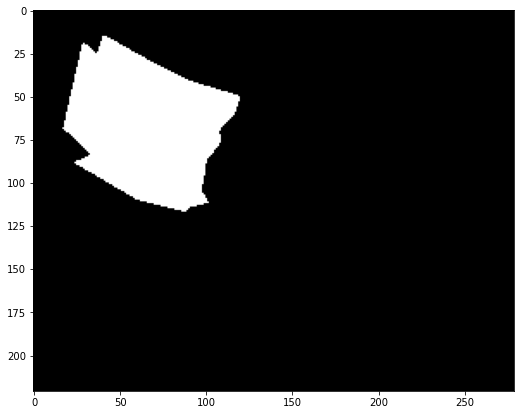

In [22]:
mask5 = hill_data==5
plt.imshow(mask5, cmap = 'gray')

mask = np.logical_and(hill_data==5, polint_data>3*np.sqrt(var_polint_data))
i_good = mask.nonzero()
#i_good_coord = np.transpose(np.nonzero(i_good))
p_good = p_data[i_good]

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]

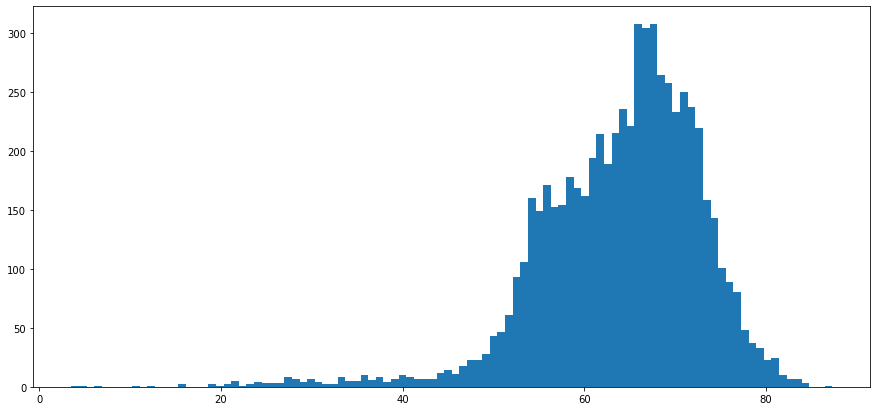

In [23]:
hist5, bins, patches = plt.hist(gamma, 100)

array([266.2119366 ,  65.55473746,   7.89573294])

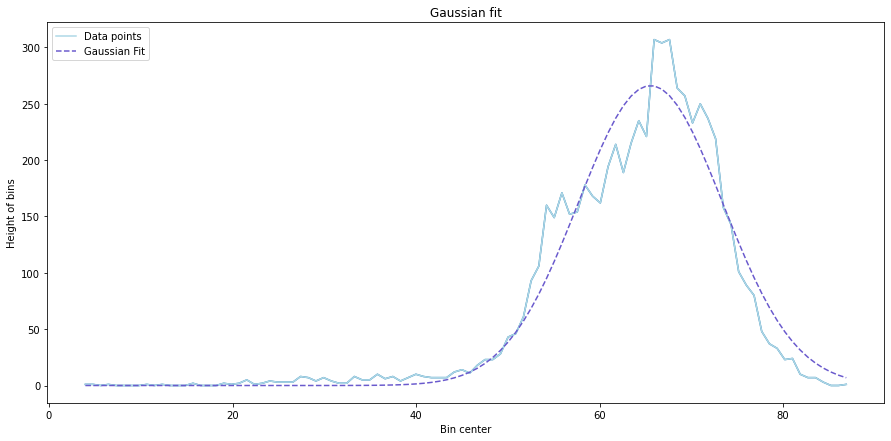

In [24]:
gauss5 = np.zeros(len(bins)-1)             #array of zeroes for bincenter

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gauss5[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gauss5, hist5)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPar,gCov = opt.curve_fit(gaussian,gauss5, hist5,p0=(300,70,0.2))#fitting the data points

gaussfit5 = gaussian(gauss5, gPar[0], gPar[1], gPar[2])


#plotting the Gaussian fit
plt.plot(gauss5, hist5, '-', color = 'lightblue', label = 'Data points')
plt.plot(gauss5, gaussfit5, '--',color = 'slateblue', label = 'Gaussian Fit')
plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

plt.grid()
gPar

<ipython-input-25-b4543bb203ba>:13: RuntimeWarning: invalid value encountered in arccos
  gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1) for p_obs in p_good]


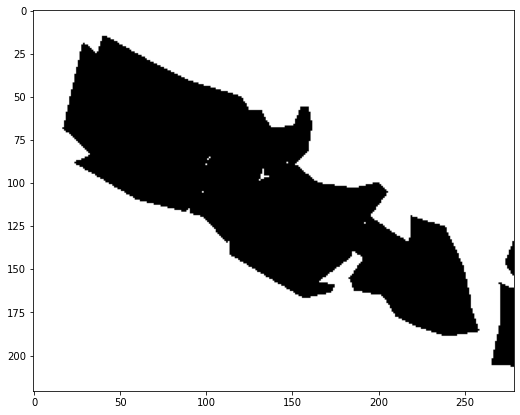

In [25]:
plt.figure(figsize = (15, 7))

mask0 = hill_data==0
plt.imshow(mask0, cmap = 'gray')

mask = np.logical_and(hill_data==0, polint_data>3*np.sqrt(var_polint_data))
i_good = mask.nonzero()
#i_good_coord = np.transpose(np.nonzero(i_good))
p_good = p_data[i_good]

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1) for p_obs in p_good]

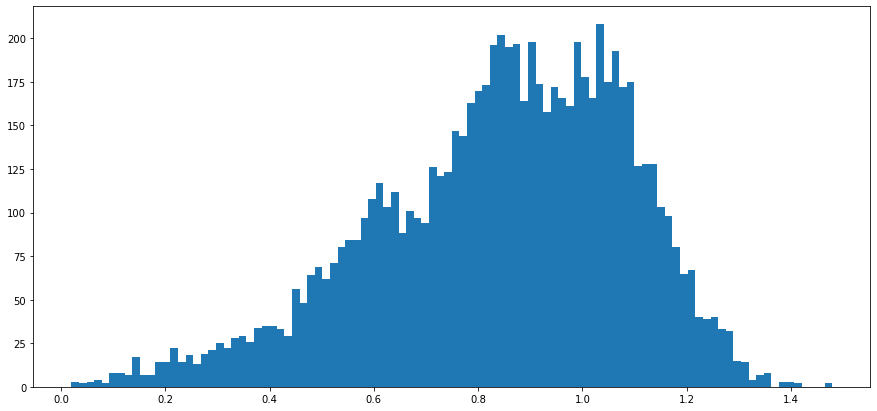

In [26]:
hist0, bins, patches = plt.hist(gamma, 100)

array([187.3619902 ,   0.88949136,   0.23695588])

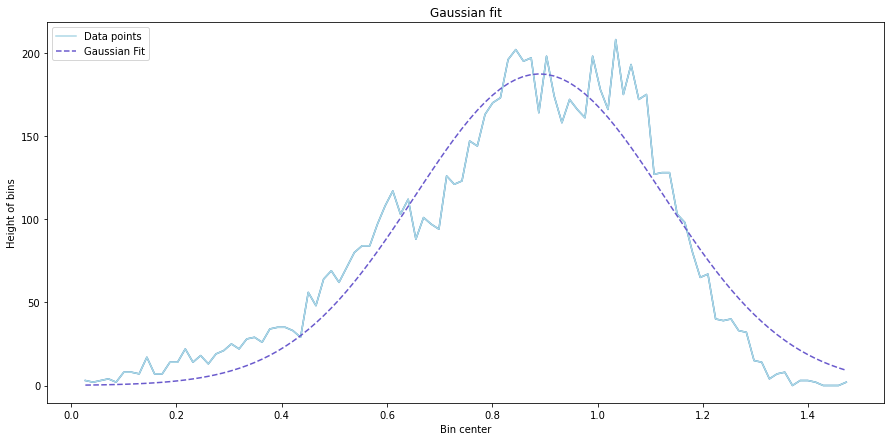

In [27]:
gauss0 = np.zeros(len(bins)-1)             #array of zeroes for bincenter

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gauss0[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gauss0, hist0)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPar,gCov = opt.curve_fit(gaussian,gauss0, hist0,p0=(600,1.1,0.2))#fitting the data points

gaussfit0 = gaussian(gauss0, gPar[0], gPar[1], gPar[2])


#plotting the Gaussian fit
plt.plot(gauss0, hist0, '-', color = 'lightblue', label = 'Data points')
plt.plot(gauss0, gaussfit0, '--',color = 'slateblue', label = 'Gaussian Fit')
plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

plt.grid()
gPar

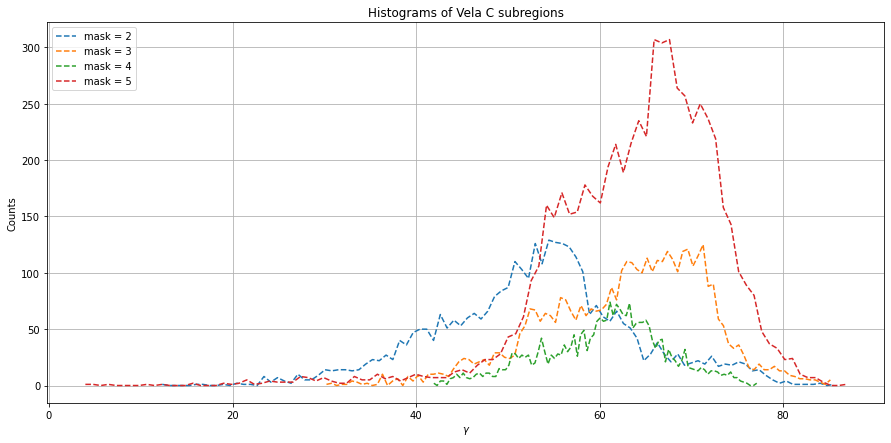

In [28]:
#plt.plot(gauss0, hist0, '--', label = 'mask = 0')
#plt.plot(gauss1, hist1, '--', label = 'mask = 1')
plt.plot(gauss2, hist2, '--', label = 'mask = 2')
plt.plot(gauss3, hist3, '--', label = 'mask = 3')
plt.plot(gauss4, hist4, '--', label = 'mask = 4')
plt.plot(gauss5, hist5, '--', label = 'mask = 5')


#plt.plot(gauss0, gaussfit, '--', label = 'gaussfit0')
plt.legend(loc = 'upper left')
plt.title('Histograms of Vela C subregions')
#plt.xscale('log')
plt.xlabel('$\gamma$')
plt.ylabel('Counts')
plt.grid()

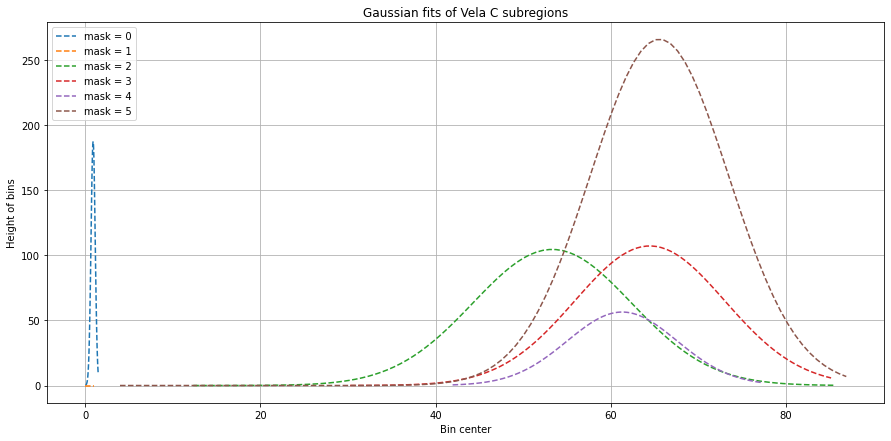

In [29]:
plt.plot(gauss0, gaussfit0, '--', label = 'mask = 0')
plt.plot(gauss1, gaussfit1, '--', label = 'mask = 1')
plt.plot(gauss2, gaussfit2, '--', label = 'mask = 2')
plt.plot(gauss3, gaussfit3, '--', label = 'mask = 3')
plt.plot(gauss4, gaussfit4, '--', label = 'mask = 4')
plt.plot(gauss5, gaussfit5, '--', label = 'mask = 5')

plt.legend(loc = 'upper left')
plt.title('Gaussian fits of Vela C subregions')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
#plt.xscale('log')

plt.grid()